# Module 2: Example with Neural Networks

In this notebook we will use a Neural Network to classify the instances in the Iris flower dataset. Concretely, we will use the `MultiLayerPerceptron` class, the implementation of `scikit-learn` that allows us to create several layer neural networks easily.

Let's import the required classes:

In [ ]:
# Import packages
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Now, we load the data:

In [ ]:
# Import data
iris = datasets.load_iris()
x = iris.data
y = iris.target

And split in train and test:

In [ ]:
# Split train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

It's normally a good practice to check that the data you have is what you expected. Let's see the shape of our data:

In [ ]:
print('xtrain shape: ', xtrain.shape)
print('ytrain shape: ', ytrain.shape)
print('xtest shape: ', xtest.shape)
print('ytest shape: ', ytest.shape)

xtrain shape:  (100, 4)
ytrain shape:  (100,)
xtest shape:  (50, 4)
ytest shape:  (50,)


Creem el classificador, en aquest cas, utilitzarem la classe MLPClassifier de sklearn.

We will now create the classifier. In this notebook, we will use the `MLPClassifier` implementation available in scikit-learn. 

There are different parameters we can adjust to try to improve the model performance:

```
hidden_layer_sizes: tuple, length = n_layers - 2, default=(100,)
The ith element represents the number of neurons in the ith hidden layer.

activation: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
Activation function for the hidden layer.

‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x

‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).

‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

solver: {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
The solver for weight optimization.

‘lbfgs’ is an optimizer in the family of quasi-Newton methods.

‘sgd’ refers to stochastic gradient descent.

‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

alpha: float, default=0.0001
L2 penalty (regularization term) parameter.

batch_size: int, default=’auto’
Size of minibatches for stochastic optimizers. If the solver is ‘lbfgs’, the classifier will not use minibatch. When set to “auto”, batch_size=min(200, n_samples)

learning_rate: {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
Learning rate schedule for weight updates.

‘constant’ is a constant learning rate given by ‘learning_rate_init’.

‘invscaling’ gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)

‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.

Only used when solver='sgd'.

learning_rate_init: double, default=0.001
The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.

power_t: double, default=0.5
The exponent for inverse scaling learning rate. It is used in updating effective learning rate when the learning_rate is set to ‘invscaling’. Only used when solver=’sgd’.

max_iter: int, default=200
Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

shuffle: bool, default=True
Whether to shuffle samples in each iteration. Only used when solver=’sgd’ or ‘adam’.

random_state: int, RandomState instance, default=None
Determines random number generation for weights and bias initialization, train-test split if early stopping is used, and batch sampling when solver=’sgd’ or ‘adam’. Pass an int for reproducible results across multiple function calls. See Glossary.
```


Now, let's dessign the neural network. We will build a network with 2 hidden layers de 5 i 10 neurones, plus the input and output layers. The learning rate will be set to 0.01, the batch size to 10 and the activation function of every hidden layer will be ReLu.

In [ ]:
# Init the Classifier
model = MLPClassifier(hidden_layer_sizes=(5, 10), batch_size=10)

We can now train the model:

In [ ]:
# Train the model 
model.fit(xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size=10, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

And once trained, predict the labels for the test set:

In [ ]:
# Predict Output 
preds = model.predict(xtest)

Let's see the result. We'll compute the confusion matrix, which contains information about true positives/negatives and false positives/negatives

Text(89.18, 0.5, 'Predicted')

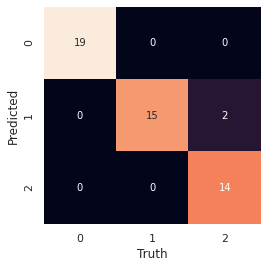

In [ ]:
# Plot Confusion Matrix
mat = confusion_matrix(preds, ytest)
names = np.unique(preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

Proveu a variar els paràmetres i observeu com canvien els resultats.

We can also compute the most common classification metrics with the help of sklearn.metrics.classification_report. These metrics include the precission, recall, f1-score and support of each class. For more information regarding these metrics, you can refer to the theoretical slides or access the documentation.

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(ytest, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.88      1.00      0.94        15
           2       1.00      0.88      0.93        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



Finally, we can also graphically show the decision boundaries for the 3 classes. However, since we will visualize them in 2 dimensions, we'll need to re-train the algorithm with just 2 of the 4 available variables. For this example, we'll take the first 2, but feel free to try with any other combination!

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(3.3, 8.880000000000006, 1.0, 5.380000000000004)

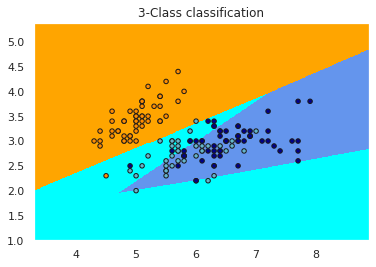

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X = iris.data[:, :2]
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Train the model 
model.fit(xtrain[:, :2], ytrain) # to visualize in 2-dim, we can only take 2 variables
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.title("3-Class classification")
plt.axis('tight')